QB_Logo.svg


---
Fundamentals of Quantitative Biology 301400-1, WS2023

# **Statistics 03**
---


**This assignment is due Thursday, 11.01.24, 08:00**

Your grade is determined by your solution to the exercises, which you will upload to Moodle as a .ipynb file.

These notebooks are designed to be worked through step by step, so we encourage you to go through all of it!  This notebook has many tutorial cells that might help you get started with Python and coding in general.  However, only the **exercises** are graded.

Please turn in a Colab notebook (just like this one) with the exercises and your solutions in the cell(s) directly after each exercise.  You can delete the extraneous tutorial cells, or just make a new file with just the exercises). Make sure to write enough comments so that anyone could follow your code and thought processes!  As a last step, make sure that your file can run without errors ("Runtime" menu > "Restart and Run all").

This assignment is worth **100 points**, and there are also some **"bonus tasks"** that can help you earn the full points, in case of missed points in the core exercises!


# Introduction Task 1

In the last Colab, we learned about visualization tools such as the histogram or the QQ plot to "test" the hypothesis of whether your sample follows a normal distribution. But as you may have noticed, the evaluation with plots only can be very difficult and inconclusive. Therefore, in this colab we will learn how to test a hypothesis with a predefined significance level $\alpha$.

The basic concept of hypothesis testing is to carefully define the null hypothesis $H_0$ (which you want to reject) and an alternative hypothesis $H_a$. Then you can take advantage of the property that, for example, by applying the central limit theorem, the test statistic (which is a random variable) follows a certain distribution if the null hypothesis is true. Therefore, you can use the quantiles of this distribution to check whether your sample takes on a 'too extreme' value that leads to a rejection of the null hypothesis $H_0$.


Population Data (First 5 Rows):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Population Size: 333

Sample Data (First 5 Rows):
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
30      Adelie      Dream            39.5           16.7              178.0   
317     Gentoo     Biscoe            46.9           14.6              222.0   
79      Adelie  Torgersen            42.1           19.1              195.0   
201  C

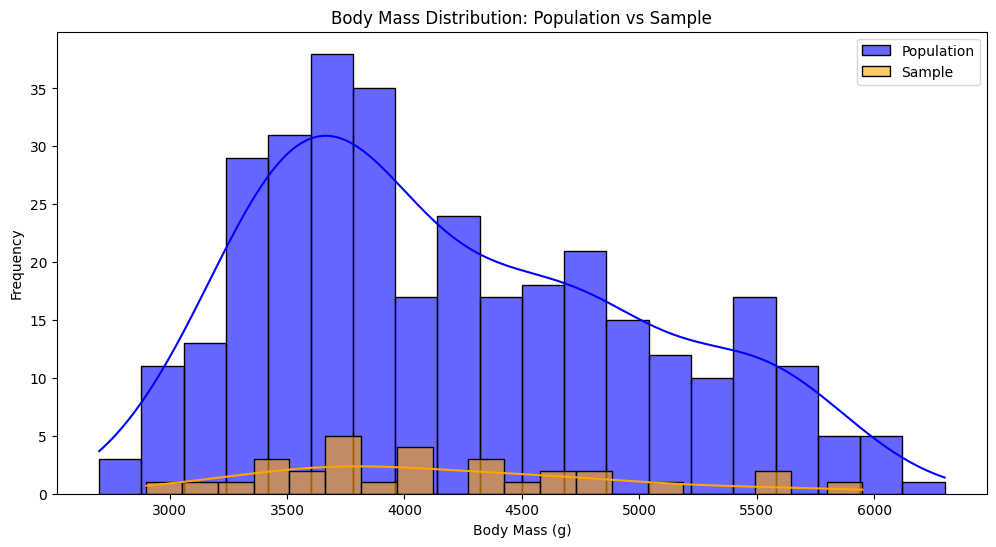

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the Palmer Penguins dataset
# The dataset is available via seaborn's built-in datasets
penguins_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

# Load the dataset into a pandas DataFrame
population = pd.read_csv(penguins_url)

# Display the first few rows of the dataset
print("Population Data (First 5 Rows):")
print(population.head())

# Check for missing values and drop rows with missing data
population = population.dropna()

# Display the size of the population
print(f"\nPopulation Size: {len(population)}")

# Treat the dataset as a population and perform random sampling
# Let's take a random sample of size 30 from the population
sample_size = 30
sample = population.sample(n=sample_size, random_state=42)

# Display the sample
print("\nSample Data (First 5 Rows):")
print(sample.head())

# Perform some basic statistics on the population and the sample
# For example, let's calculate the mean body mass for the population and the sample
population_mean_body_mass = population['body_mass_g'].mean()
sample_mean_body_mass = sample['body_mass_g'].mean()

print(f"\nPopulation Mean Body Mass: {population_mean_body_mass:.2f} g")
print(f"Sample Mean Body Mass: {sample_mean_body_mass:.2f} g")

# Visualize the population and sample distributions
plt.figure(figsize=(12, 6))

# Plot the population distribution
sns.histplot(population['body_mass_g'], kde=True, color='blue', label='Population', bins=20, alpha=0.6)

# Plot the sample distribution
sns.histplot(sample['body_mass_g'], kde=True, color='orange', label='Sample', bins=20, alpha=0.6)

# Add labels and legend
plt.title('Body Mass Distribution: Population vs Sample')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
len(population['body_mass_g'].to_list())

333


# [40 points] Task 1:

Assume you have a collection of independent samples $x_1, \ldots, x_n$ following the same probability distribution $P(\mu, \sigma)$ with **unknown** mean parameter $\mu$ but **known** standard deviation $\sigma$.

As you already learned, you can estimate the unknown mean $\mu$ of distribution $P(\mu,\sigma)$ by the computing sample mean
$$
\hat{\mu} = \overline{x} = \frac{1}{n}\sum^n_{i=1}x_i.
$$
Now, by central limit theorem it holds that for large enough $n$, approximately
$$
\frac{\overline{x} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1).
$$
This statement allows you to directly calculate a confidence interval for significance level $\alpha$ around your sample mean $\overline{x}$.

Let for this Task 1 $\alpha = 0.05$, then the confidence interval around $\overline{x}$ is defined as
$$
\left[\overline{x} - 1.96 \frac{\sigma}{\sqrt{n}}, \overline{x} + 1.96 \frac{\sigma}{\sqrt{n}}\right].
$$

1. [10 points] If the theoretical mean of an exponential distribution is $\frac{1}{\lambda} = 4$, what is respective theoretical standard deviation $\sigma$?

2. [10 points]
Call `np.random.seed(1)` and directly afterwards simulate 500 observations from the exponential distribution with parameter `scale = 4` $\left(=\frac{1}{\lambda}\right)$. Compute the sample mean of the 500 observations.

3. [10 points] Calculate the confidence interval around the sample mean that you calculated in 2. using the formula above (and the theoretical standard deviation $\sigma$ that you calculated in 1.)

4. [10 points] We now want to repeat steps 2. and 3. several times. Hence, initiate three lists `CI_left = []`, `CI_right = []` and `means = []`. Using a `for`-loop, do the following for $100$ times:
   * Draw 500 observations from the exponential distribution with `scale = 4` $\left(=\frac{1}{\lambda}\right)$.
   * Compute the sample mean of these 500 observations and add it to list `means`.
   * Compute the confidence interval around the sample mean of the 500 observations. Append `CI_left = []` with the lower bound of the interval and `CI_right = []` with the upper bound.
   
   Directly before the `for`-loop call `np.random.seed(1)`. After your `for`-loop, lists `CI_left = []`, `CI_right = []` and `means = []` should have 100 different entries. Plug those three lists in the function `plot_confidence_intervals` that is defined below and execute it. Try to understand the code and why the output plot shows red and blue lines. What does the number of red lines have to do with the significane level $\alpha = 0.05$?
  

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

def plot_confidence_intervals(means_input, CI_left_input, CI_right_input, true_mean):

  figure(figsize=(8, 6), dpi=80)

  plt.title('Confidence Intervals for ' + str(len(means_input)) + ' Simulated Means')
  plt.axhline(y = true_mean, color = 'gray', linestyle = '--',  linewidth = 3)

  for iter in range(len(means_input)):
    x = means_input[iter]
    bottom = CI_left_input[iter]
    top = CI_right_input[iter]

    col = "red"

    if true_mean >= bottom and true_mean <= top:
      col = "blue"

    plt.plot([iter, iter], [top, bottom], color=col)
    plt.plot(iter, x, 'o', color="black")
    plt.plot(iter, x, 'o', color="black")

  plt.show()

In [ ]:
# 1.1
print("The standard deviation is equal to the mean, 1/lambda, i.e., 4")

The standard deviation is equal to the mean, 1/lambda, i.e., 4


In [ ]:
# 1.2
true_mean = 4
true_sd = 4
n = 500
z = 1.96

np.random.seed(1)

exponentials = np.random.exponential(true_mean, n)
print("The sample mean is " + str(np.mean(exponentials)))

The sample mean is 4.106905603373081


In [ ]:
# 1.3
confidence_interval = z * true_sd/n**0.5
left = np.mean(exponentials) - confidence_interval
right = np.mean(exponentials) + confidence_interval

print("The condifence interval is [" + str(left) + "," + str(right) + "]")

The condifence interval is [3.7562901445011136,4.457521062245048]


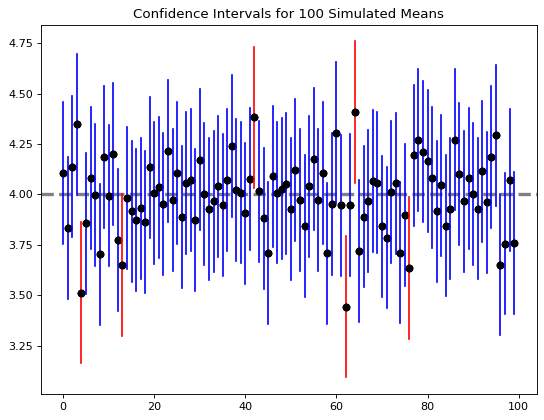

In [ ]:
# 1.4
means = []
CI_left = []
CI_right = []

np.random.seed(1)
for i in range(100):
  exponentials = np.random.exponential(true_mean,n)
  confidence_interval = z * true_sd/n**0.5
  left = np.mean(exponentials) - confidence_interval
  right = np.mean(exponentials) + confidence_interval

  means.append(np.mean(exponentials))
  CI_left.append(left)
  CI_right.append(right)

plot_confidence_intervals()

# Introduction Task 2

With scRNA-seq, we can use the similarity of the expression patterns of cells to determine which cell type they might belong to. Suppose we have can group cells in our data into three different cell types. How can we investigate which genes exactly distinguish the cell types? To find out whether a gene is generally more strongly expressed in one cell type than in another, we can, for example, compare the mean expression values of this gene in the respective cell types.

To state whether the mean expression of a gene in one cell type is *significantly* different the mean expression in another cell type, we can again use hypothesis testing. In contrast to the setting in Task 1, for our data we do not know the theoretical variance $\sigma^2$ of a gene expression vector. Hence, we can not plug in any theoretical standard normal distribution for our test. However, we can use the sample variance
$$
s^2 = \frac{1}{n-1}\sum^n_{i = 1}(x_i -\overline{x})^2
$$
as an estimator for the true variance $\sigma^2$.

For now, denote the expression values of a gene in cells of the first cell type as $x$ and the expression values of the same gene in cells of the second cell type as $y$. Then, our null hypothesis is $H_0: \mu_x = \mu_y$, i.e., there is no difference in the true mean gene expressions of the two cell types. The alternative hypothesis is $H_a: \mu_x \neq \mu_y$ (two-sided test).

The test statistic for two samples means $x$ and $y$ of respective sample sizes $n_x$ and $n_y$ is
$$
t = \frac{\bar{x} - \bar{y}}{s_p \cdot \sqrt{\frac{1}{n_x} + \frac{1}{n_y}}},\sim T_{n_x + n_y - 2},
$$
where $T_{n_x + n_y - 2}$ is the Student's t distribution with $n_x + n_y - 2$ degrees of freedom, $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$ and $s_p$ is the pooled standard deviation of both samples
$$
s_p = \sqrt{\frac{(n_x - 1) s^2_{x} + (n_y - 1) s^2_{y}}{n_x + n_y - 2}},
$$
where $s^2_{x}$ and $s^2_{y}$ are the sample variances of $x$ and $y$. Note that the assumption for this version of the t-test is that the two samples have similar variances $\sigma^2_y, \sigma^2_x$.

The **p-value** can be interpreted as: Assuming that I live in a world where the null hypothesis holds, how probable is it that, for another sample, the test I'm performing will generate a value at least as extreme as the one I observed for the sample I already have?

In the following we show a small example, how to compute the p-value for a t-test with with test stastic value $t = 2$ and 20 degrees of freedom:

In [ ]:
from scipy import stats
t = 2 # some test statistic value
df = 20 # degrees of freedom

# obtain p-value for two-sided test for a Student's t distributed test statistic
p_value = 2*(1 - stats.t.cdf(abs(t), df))
print("p-value: ", p_value)

p-value:  0.05926553544657054


We multiply the probability from the cumulative distribution function (cdf) of the Student's t distribution with 2 because we are doing a two-sided test, meaning we take into account that the mean of one sample is larger than the other as well as the other way around (see the definition of the alternative hypothesis $H_a: \mu_x \neq \mu_y$).

If we perform $m$ statistical tests that might be dependent we should correct for multiple testing error. One approach to do this is to multiply each $p$-value by the number of tests ($m$), resulting in so-called adjusted $p$-values. This is referred to as Bonferroni correction.

# [40 points] Task 2

For task 2, set the significance level $\alpha = 0.01$ and assume that the variances are similar in all samples fulfilling the assumptions of a t-test.

We again load the log-normalized scRNA-seq dataset `adata_lognormed_final.csv` and also the cell type labels `cluster_labels.txt`, which you can find via **Moodle**, and upload both files to your Colab. The length of the array in `cluster_labels.csv` is the number of cells in your scRNA-seq dataset. The number of the $i$th entry in `cluster_labels.csv` indicates the cell type to which the $i$th cell belongs.

1. [10 points] Compute the sample mean expression of gene `CST3` in cell type 0 (all cells that belong to cell type 0) and cell type 2 (all cells that belong to cell type 2).
2. [10 points] Perform a t-test for `CST3` mean expressions in cell type 0 and cell type 2 using the above illustrated function `stats.t.cdf()`. What is the value of the test statistic and what is the p-value? Do we reject the null hypothesis?
3. [10 points] For the first 1000 genes in the data set, perform a t-test for their mean expression in cell type 1 and cell type 2 using the `stats.ttest_ind()` function. For how many genes do we reject the null hypothesis?
4. [10 points] Apply a Bonferroni correction to the results of 2. How many genes are differentially expressed after applying the correction?
5. [10 points] **[BONUS TASK]** One can visualize differentially expressed genes via a vulcano plot: Each dot is a gene, the x-axis denotes
$$
log_2(FC) = log_2\left(\frac{\overline{x} + 1}{\overline{y} + 1}\right),
$$
where FC is the fold change of gene expression and the y-axis denotes
$$-log_{10}(\text{Bonferroni corrected p-value} + 1\text{e}-200)).$$
Plot all genes of the dataset comparing cell types 0 and 2. Plot those genes with a Bonferroni corrected p-value higher than 1e-10 and $|log_2(FC)| >= 1$ as red points and all other genes as blue points.

In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd

drive.mount('/content/drive')
counts = pd.read_csv('/content/drive/MyDrive/MPL_QuantitativeBiology/data/STATS/STATS_03/adata_lognormed_final.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
label = np.loadtxt('/content/drive/MyDrive/MPL_QuantitativeBiology/data/STATS/STATS_03/cluster_labels.txt')
label

array([2., 2., 2., ..., 2., 1., 2.])

In [ ]:
## 1.1

cluster_0 = counts.loc[label == 0, :]
cluster_1 = counts.loc[label == 1, :]
cluster_2 = counts.loc[label == 2, :]

mean_0, mean_2 = np.mean(cluster_0.loc[:,"CST3"]), np.mean(cluster_2.loc[:,"CST3"])
print("The mean expression of Gene CST3 in cluster 0 is ",mean_0)
print("The mean expression of Gene CST3 in cluster 2 is ",mean_2)

The mean expression of Gene CST3 in cluster 0 is  0.7918049259870132
The mean expression of Gene CST3 in cluster 2 is  0.8350049070184058


In [ ]:
## 1.2

alpha = 0.01

n_1, n_2 = len(cluster_0.loc[:,"CST3"]), len(cluster_2.loc[:,"CST3"])
mean_0, mean_2 = np.mean(cluster_0.loc[:,"CST3"]), np.mean(cluster_2.loc[:,"CST3"])
std_0, std_2 = np.std(cluster_0.loc[:,"CST3"]), np.std(cluster_2.loc[:,"CST3"])
var_0, var_2 = np.var(cluster_0.loc[:,"CST3"]), np.var(cluster_2.loc[:,"CST3"])

df = n_1 + n_2 - 2.0
s_p = ((n_1 - 1.0) * var_0 + (n_2 - 1.0) * var_2) / df
print("The pooled standard deviation is: ", s_p**0.5)
t_stat = (mean_0 - mean_2) / np.sqrt(s_p * (1.0 / n_1 + 1.0 / n_2))

print("The test statistic is ", t_stat)
print("Degrees of freedom: " + str(df))

p = 2*(1-stats.t.cdf(abs(t_stat), df))
print("The p-value is",p, "hence we cannot reject the null hypothesis for significance level", alpha, ".")

# internal test:
stats.ttest_ind(cluster_0.loc[:,"CST3"], cluster_2.loc[:,"CST3"])

The pooled standard deviation is:  1.5699697162462227
The test statistic is  -0.46094109178203
Degrees of freedom: 1444.0
The p-value is 0.6449102833056051 hence we cannot reject the null hypothesis for significance level 0.01 .


TtestResult(statistic=-0.46062925522890885, pvalue=0.6451339791963323, df=1444.0)

In [ ]:
## 1.3

genenames = np.array(counts.columns)

pvalues = []
for gene in genenames[0:1000]:
  test = stats.ttest_ind(cluster_1.loc[:,gene], cluster_2.loc[:,gene])
  pvalues.append(test.pvalue)

print("There are", np.sum(np.array(pvalues) <= alpha), "differentially expressed genes between cluster 1 and 2.")

There are 390 differentially expressed genes between cluster 1 and 2.


In [ ]:
## 1.4

# Bonferroni corrected alpha
alpha_bonfi = alpha/len(pvalues)
print("After Bonferroni correction there are", np.sum(np.array(pvalues) <= alpha_bonfi), "differentially expressed genes.")

After Bonferroni correction there are 203 differentially expressed genes.


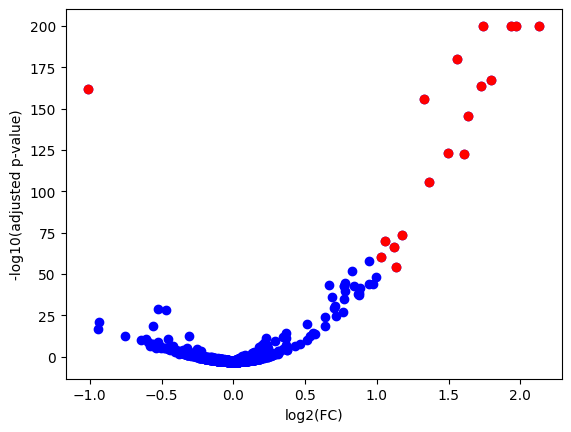

In [ ]:
## BONUS TASK 1.5
import matplotlib.pyplot as plt

genenames = np.array(counts.columns)

gene_FCs = []
pvalues = []

for gene in genenames:
  FC = (np.mean(cluster_0.loc[:,gene]) + 1)/(np.mean(cluster_2.loc[:,gene]) + 1)
  gene_FCs.append(FC)

  test = stats.ttest_ind(cluster_0.loc[:,gene], cluster_2.loc[:,gene])
  pvalues.append(test.pvalue)

pvalues = np.array(pvalues)*len(pvalues)
gene_FCs = np.array(gene_FCs)

index_pval = pvalues <= 1e-10
index_FC_smaller = abs(np.log2(gene_FCs)) >= 1

index = index_FC_smaller & index_pval

plt.scatter(x = np.log2(gene_FCs), y= -np.log10(pvalues + 1e-200), color = "blue")
plt.scatter(x = np.log2(gene_FCs)[index], y= -np.log10(pvalues + 1e-200)[index], color = "red")
plt.ylabel("-log10(adjusted p-value)")
plt.xlabel("log2(FC)")
plt.show()

# Introduction Task 3
If you want to design an experiment you might wonder how many samples are sufficient to reliably test your hypothesis. To answer this question, power analysis can be a helpful approach.

In hypothesis testing 2 types of errors can arise:

* A **Type I Error** occurs when you reject the null hypothesis even though it is true. This is directly controlled by the choice of significance level $\alpha$: If you set $\alpha = 0.05$ you will have a 5% chance of a type I error.
* A **Type II Error** means that you accept the null hypothesis when it is actually not true. The probability of a type II error is usually denoted as $\beta$.

**Statistical power** is the probability that you don't make a type II error, i.e., $1 - \beta$. ([This plot](https://en.wikipedia.org/wiki/Power_of_a_test#/media/File:Statistical_test,_significance_level,_power.png) nicely illustrates it).

In the following, we want to do a power analysis for a t-test by using the `solve_power()` function from the `statsmodels.stats.power.TTestIndPower` module: You input parameters you assume, i.e., the significance level $\alpha$, the power $1 - \beta$ and the effect size, and set the parameter you want to estimate to `None`. The parameter `effect_size` describes the minimal effect, i.e., in context of the t-test the minimal difference in means, you want to detect:

In [ ]:
from statsmodels.stats.power import TTestIndPower

alpha = 0.05
power = 0.8
effect_size = 0.8

analysis = TTestIndPower()
sample_size = analysis.solve_power(alpha=alpha, power=power, effect_size=effect_size, nobs1=None)

print("The minimum required sample size per group is: ", sample_size)

The minimum required sample size per group is:  25.52457250047935


# [20 points] Tasks 3

1. [10 points] Assume you want to do a t-test of a sample mean against a theoretical value with significance level $\alpha = 0.05$ and a sample size $n = 20$ (= `nobs1`). What is the probability (= statistical power) that you are able to detect an effect size of at least 1?

2. [10 points] Calculate the statistical power for significance level $\alpha = 0.05$ and every sample size from $n =3$ to $n = 60$. Create a scatterplot with the sample size on the x-axis and the statistical power on the y-axis. What can you observe for increasing sample sizes?

In [ ]:
# 2.1

alpha = 0.05
sample_size = 20
effect_size = 1

analysis = TTestIndPower()
power = analysis.solve_power(alpha=alpha, power=None, effect_size=effect_size, nobs1=sample_size)

print("The power of the test under the assumptions made is:", power)

The power of the test under the assumptions made is: 0.8689530131730794


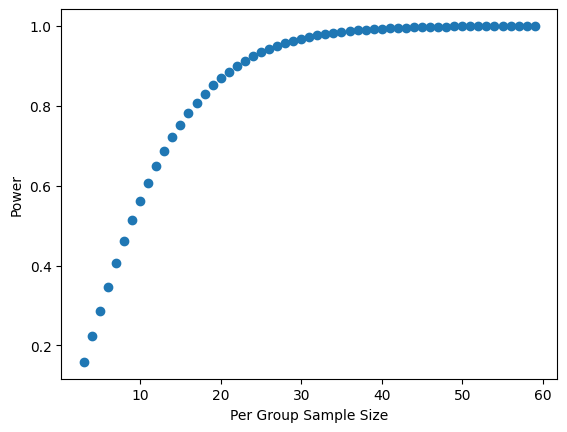

In [ ]:
# 2.2

power_array = []
sample_array = []

for sample_size in np.arange(3, 60):
  power = analysis.solve_power(alpha=alpha, power=None, effect_size=effect_size, nobs1=sample_size)
  power_array.append(power)
  sample_array.append(sample_size)

plt.scatter(x=sample_array, y=power_array)
plt.xlabel("Per Group Sample Size")


plt.ylabel("Power")
plt.show()